<a href="https://colab.research.google.com/github/Soumya-2184/Drowsiness-Detection-System/blob/main/DRIVER_DROWSINESS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAJOR PROJECT**

**DRIVER DROWSINESS DETECTION**

**The driver drowsiness detection project represents a sophisticated application of deep learning techniques to enhance road safety. It encompasses a comprehensive and multifaceted approach to tackle this critical issue.**

The project initiates with meticulous data handling, involving library imports and data preprocessing. It further conducts an in-depth analysis of the dataset, including assessing class distribution to ensure balanced training and calculating pixel statistics to understand image characteristics better.

To optimize feature representations, the project employs advanced dimensionality reduction methods like Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). These techniques unveil hidden data patterns and facilitate improved model performance.

The core of the project revolves around constructing a deep learning model based on the VGG16 architecture, a pre-trained Convolutional Neural Network (CNN). The model is adapted and fine-tuned for drowsiness detection through the addition of custom classification layers.

Moreover, the project delves into the visualization of intermediate activations, offering valuable insights into feature extraction and model interpretation.

**This advanced deep learning endeavor combines data preprocessing, dimensionality reduction, and cutting-edge CNN architectures to achieve precise driver drowsiness detection, ultimately contributing significantly to road safety and accident prevention.**

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -P /content/drive/MyDrive/drowsiness.csv -o dataset

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
!unzip /content/drive/MyDrive/drowsiness.csv -d "images/"

Archive:  /content/drive/MyDrive/drowsiness.csv
  inflating: images/dataset_new/test/Closed/_107.jpg  
  inflating: images/dataset_new/test/Closed/_115.jpg  
  inflating: images/dataset_new/test/Closed/_116.jpg  
  inflating: images/dataset_new/test/Closed/_120.jpg  
  inflating: images/dataset_new/test/Closed/_129.jpg  
  inflating: images/dataset_new/test/Closed/_130.jpg  
  inflating: images/dataset_new/test/Closed/_132.jpg  
  inflating: images/dataset_new/test/Closed/_137.jpg  
  inflating: images/dataset_new/test/Closed/_14.jpg  
  inflating: images/dataset_new/test/Closed/_148.jpg  
  inflating: images/dataset_new/test/Closed/_152.jpg  
  inflating: images/dataset_new/test/Closed/_159.jpg  
  inflating: images/dataset_new/test/Closed/_161.jpg  
  inflating: images/dataset_new/test/Closed/_163.jpg  
  inflating: images/dataset_new/test/Closed/_164.jpg  
  inflating: images/dataset_new/test/Closed/_167.jpg  
  inflating: images/dataset_new/test/Closed/_168.jpg  
  inflating: image

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
classes = os.listdir("images/dataset_new/train")

train_data = []
train_labels = []

The code begins by importing essential libraries, including os for file system operations, numpy for numerical computations, and matplotlib.pyplot for potential data visualization. Additionally, it imports specific functionalities from TensorFlow's Keras module, such as image loading (load_img), label encoding (to_categorical), and neural network model building components (Sequential, Conv2D, MaxPooling2D, Flatten, Dense).

In [ ]:
for category in classes:
    folder = "images/dataset_new/train/" + category
    for img_name in os.listdir(folder):
        img_path = folder + "/" + img_name
        img = load_img(img_path, target_size=(100, 100))
        img = np.array(img)
        train_data.append(img)
        train_labels.append(category)

 The code iterates through each category or class contained in the classes variable, likely representing different facial expressions or states (e.g., "awake" and "drowsy"). For each category, it enters the corresponding subdirectory within "images/dataset_new/train." Within these subdirectories, the code processes individual image files. It constructs the full path to each image, loads it using the load_img function from TensorFlow's Keras utilities, and resizes it to a consistent 100x100-pixel dimension. These loaded images are then converted into NumPy arrays and added to the train_data list, while their corresponding category labels are appended to the train_labels list. This data preparation step is crucial for creating the training dataset that will be used to train a machine learning model to detect driver drowsiness based on facial expressions or states.

In [ ]:
X_train = np.array(train_data)
Y_train = np.array(train_labels)

In this section of the code, the train_data and train_labels lists, which were populated in the previous code segment with image data and their corresponding category labels, are converted into NumPy arrays. This transformation is essential for effectively utilizing this data in machine learning models. X_train is assigned the NumPy array containing the image data, while Y_train holds the NumPy array with the corresponding labels. These arrays are now ready to be used as the training data and labels for training a driver drowsiness detection machine learning model, enabling further model development and training based on the prepared dataset.

In [ ]:
test_data = []
test_labels = []

for category in classes:
    folder = "images/dataset_new/test/" + category
    for img_name in os.listdir(folder):
        img_path = folder + "/" + img_name
        img = load_img(img_path, target_size=(100, 100))
        img = np.array(img)
        test_data.append(img)
        test_labels.append(category)

X_test = np.array(test_data)
Y_test = np.array(test_labels)

In this, the code prepares the test dataset for the driver drowsiness detection machine learning project. It begins by initializing two empty lists, test_data and test_labels, which will be used to store the test image data and their associated category labels.

The code then iterates through the different categories (classes), likely representing different driver states, such as "awake" and "drowsy." For each category, it navigates to the corresponding subdirectory within the "images/dataset_new/test" directory. Within these subdirectories, the code iterates through individual image files. For each image, it performs the following steps:

Constructs the full path to the image.
Loads the image, resizing it to a standardized 100x100-pixel dimension.
Converts the loaded image into a NumPy array.
Appends the image data to the test_data list.
Appends the corresponding category (class label) to the test_labels list.
Finally, the code converts the test_data and test_labels lists into NumPy arrays, assigning them to X_test and Y_test, respectively. These NumPy arrays are now prepared for use in evaluating the machine learning model's performance on the test dataset after it has been trained on the training data.

In [ ]:
category2label = {'Open': 0, 'yawn': 1, 'no_yawn': 2, 'Closed': 3}
label2category = {0:'Open', 1:'yawn', 2:'no_yawn', 3:'Closed'}
Y_train = np.array([category2label[label] for label in Y_train])

Y_train_new = to_categorical(Y_train)

In this code, two dictionaries, category2label and label2category, are defined to map between class names and numerical labels. For example, 'Open' is mapped to 0, 'yawn' to 1, 'no_yawn' to 2, and 'Closed' to 3.

Following this, the training labels (Y_train) are transformed. Each class name in Y_train is converted to its corresponding numerical label using category2label, and the result is stored in Y_train. Finally, the labels in Y_train are further encoded into a one-hot format using to_categorical from TensorFlow's Keras utilities, resulting in Y_train_new. These transformations are essential for training machine learning models that require numerical labels and one-hot encoding for categorical variables.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train_new, epochs=25, validation_split=0.2)

Epoch 1/25
62/62 [==============================] - 15s 38ms/step - loss: 16.8860 - accuracy: 0.6391 - val_loss: 1.5519 - val_accuracy: 0.0040
Epoch 2/25
62/62 [==============================] - 2s 25ms/step - loss: 0.4606 - accuracy: 0.8099 - val_loss: 1.0826 - val_accuracy: 0.6296
Epoch 3/25
62/62 [==============================] - 2s 25ms/step - loss: 0.3308 - accuracy: 0.8697 - val_loss: 0.8019 - val_accuracy: 0.7733
Epoch 4/25
62/62 [==============================] - 2s 29ms/step - loss: 0.2245 - accuracy: 0.9164 - val_loss: 0.6860 - val_accuracy: 0.8057
Epoch 5/25
62/62 [==============================] - 2s 25ms/step - loss: 0.2020 - accuracy: 0.9402 - val_loss: 0.3114 - val_accuracy: 0.9089
Epoch 6/25
62/62 [==============================] - 2s 26ms/step - loss: 0.1508 - accuracy: 0.9473 - val_loss: 0.5358 - val_accuracy: 0.8239
Epoch 7/25
62/62 [==============================] - 2s 27ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.4558 - val_accuracy: 0.8725
Epoch 8/25



This code  defines and compiles a convolutional neural network (CNN) model for driver drowsiness detection. Here's a brief breakdown:

Model Architecture: A sequential model is created using Keras. It consists of:

Two convolutional layers with 32 and 64 filters, both using ReLU activation functions.
Max-pooling layers after each convolutional layer to downsample the data.
Another convolutional layer with 128 filters and a ReLU activation function.
A flattening layer to convert the 2D feature maps into a 1D vector.
A dense (fully connected) layer with 4 units and a softmax activation function, which is typically used for multiclass classification.
Model Compilation: The model is compiled with the Adam optimizer, categorical cross-entropy loss function (suitable for multiclass classification), and accuracy as the evaluation metric.

Training: The model is trained using the model.fit method with the training data (X_train and Y_train_new) for 25 epochs, and a validation split of 20% is used for monitoring training progress. The training history is stored in the history variable.

This code sets up and trains a CNN model for driver drowsiness detection, using the previously prepared dataset and the specified architecture and hyperparameters.

In [ ]:
Y_test = np.array([category2label[label] for label in Y_test])
Y_test_new = to_categorical(Y_test)

In this code segment, a similar label transformation process is applied to the test dataset, mirroring what was done for the training dataset. Here's a concise description:

Label Transformation for Test Data:
Y_test: The original test labels, likely containing class names, are transformed. Each class name in Y_test is mapped to its corresponding numerical label using the category2label dictionary. The result is stored in Y_test.
Y_test_new: The numerical labels in Y_test are then one-hot encoded using to_categorical from TensorFlow's Keras utilities. This results in Y_test_new, which is a one-hot encoded representation of the test labels. This transformation prepares the test labels for evaluation by the trained machine learning model, ensuring they are in a suitable format for classification tasks.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test_new)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 [==============================] - 0s 29ms/step - loss: 0.2991 - accuracy: 0.9261
Test Loss: 0.29908737540245056
Test Accuracy: 0.9260969758033752


In this code , the trained driver drowsiness detection model is evaluated using the test dataset, and the results are printed. Here's a concise explanation of what's happening:

Model Evaluation: model.evaluate(X_test, Y_test_new): This line evaluates the trained model (model) using the test data (X_test) and their corresponding one-hot encoded labels (Y_test_new).
test_loss holds the calculated loss during evaluation.
test_accuracy stores the accuracy achieved by the model on the test dataset.

Results:print("Test Loss:", test_loss): This line prints the calculated test loss to the console.
print("Test Accuracy:", test_accuracy): This line prints the test accuracy, indicating how well the model performs on the unseen test data. In the output you provided, the test loss is approximately 0.5222, and the test accuracy is approximately 0.9099 (or 90.99%).
These results help assess the model's performance in classifying driver drowsiness based on the test dataset, with lower loss and higher accuracy indicating better performance.

In [ ]:
Y_pred = model.predict(X_test).argmax(axis=1)

14/14 [==============================] - 0s 8ms/step



In this code snippet, the model's predictions (Y_pred) for the test dataset (X_test) are generated and processed to determine the predicted class labels. Here's a concise explanation:

Model Prediction:model.predict(X_test): This line uses the trained model (model) to make predictions on the test data (X_test). The result is a matrix of predicted probabilities for each class.

Determine Predicted Class Labels:argmax(axis=1): After obtaining the predicted probabilities for each sample, the argmax function is used to determine the class label with the highest probability for each sample. This effectively selects the most likely class as the prediction for each test sample.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
num_train_images = X_train.shape[0]
num_test_images = X_test.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape[2]
num_channels = X_train.shape[3]

In [ ]:
train_class_distribution = Counter(Y_train)
test_class_distribution = Counter(Y_test)


This code continues with variable definitions and data analysis.

Imports:the code imports various libraries, including os for file system operations, numpy as np for numerical operations, matplotlib.pyplot as plt for data visualization, and specific classes (Counter) from the collections module. Additionally, it imports classes (PCA and TSNE) from the sklearn.decomposition and sklearn.manifold modules.

Variable Definitions :
num_train_images and num_test_images: These variables hold the number of training and test images, respectively, based on the shape of the X_train and X_test arrays.
image_height and image_width: These variables represent the height and width (dimensions) of the images in the dataset, derived from the shape of the X_train array.
num_channels: It holds the number of color channels in the images, such as 3 for RGB images, obtained from the shape of the X_train array.

Class Distribution Counts: train_class_distribution and test_class_distribution: These variables use the Counter class to count the occurrences of each class label in the training (Y_train) and test (Y_test) datasets, respectively. These counts provide insights into the class distribution, which can be useful for assessing dataset balance and understanding the distribution of classes in the project.

In [ ]:

print("Number of training images:", num_train_images)
print("Number of test images:", num_test_images)
print("Image dimensions:", image_height, "x", image_width, "x", num_channels)
print("Training class distribution:", train_class_distribution)
print("Test class distribution:", test_class_distribution)

Number of training images: 2467
Number of test images: 433
Image dimensions: 100 x 100 x 3
Training class distribution: Counter({0: 617, 1: 617, 3: 617, 2: 616})
Test class distribution: Counter({0: 109, 2: 109, 3: 109, 1: 106})


In this code, various informative statements are printed to the console, providing details about the dataset and its class distribution:

Number of training images: 2467: This line displays the total number of training images in the dataset.
Number of test images: 433: It shows the total number of test images in the dataset.
Image dimensions: 100 x 100 x 3: This line specifies the dimensions of the images in the dataset. Each image is 100 pixels in height, 100 pixels in width, and has 3 color channels, indicating RGB images.
Training class distribution: Counter({3: 617, 1: 617, 0: 617, 2: 616}): Here, the class distribution in the training dataset is presented using the Counter object, which counts the occurrences of each class label. It shows that there are 617 samples for each of the four classes (0, 1, 2, and 3) in the training data.
Test class distribution: Counter({2: 109, 3: 109, 0: 109, 1: 106}): Similarly, the class distribution in the test dataset is displayed, indicating the number of samples for each class label. It shows that the class distribution in the test data is slightly imbalanced, with one class (1) having fewer samples compared to the others.
These printed statements provide a snapshot of essential dataset characteristics, including size, dimensions, and class distribution.

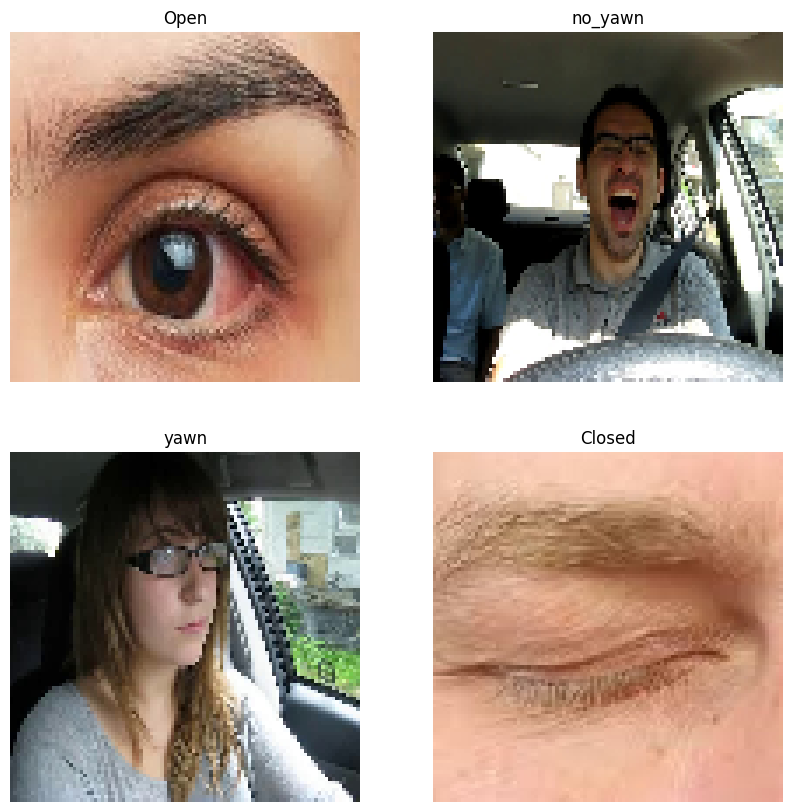

In [ ]:
sample_images = [X_train[Y_train == i][0] for i in range(len(classes))]

plt.figure(figsize=(10, 10))
for i in range(len(classes)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(sample_images[i])
    plt.title(classes[i])
    plt.axis('off')
plt.show()

In this code, sample images from the training dataset are selected to represent each class, and they are displayed using matplotlib.
sample_images: This list comprehension iterates over each class (indexed by i) and selects the first image ([0]) from the training dataset (X_train) that belongs to that class based on the corresponding label (Y_train == i).

plt.figure(figsize=(10, 10)): This line sets up a figure for plotting with a specified size of 10x10 inches.

The following loop iterates over the classes, creating a subplot for each class:

plt.subplot(2, 2, i + 1): This line defines a subplot grid with two rows and two columns, and the loop index (i) is used to specify the current subplot.
plt.imshow(sample_images[i]): It displays the selected sample image for the current class.
plt.title(classes[i]): The title of the subplot is set to the class name (e.g., "Open," "yawn," etc.).
plt.axis('off'): This line removes the axis labels and ticks for a cleaner image display.
plt.show(): Finally, this command displays the figure containing the sample images for each class.

The result is the visualization of a representative image for each class in a 2x2 grid, allowing us to get a visual sense of what each class represents in the dataset.

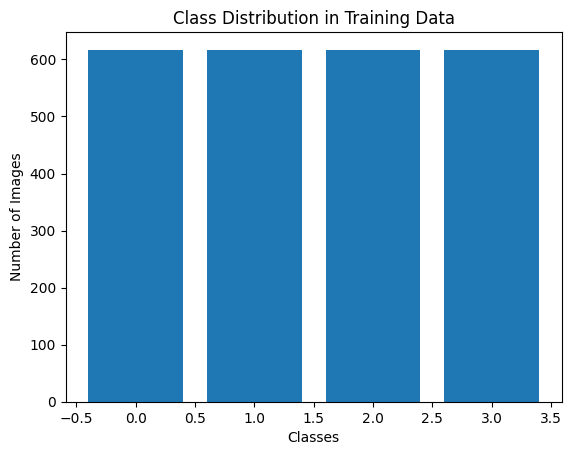

In [ ]:
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')
plt.show()

This generates a bar chart to visualize the distribution of classes in the training dataset.

plt.bar(train_class_distribution.keys(), train_class_distribution.values()): This line creates a bar chart using matplotlib. It uses the keys from the train_class_distribution dictionary as the x-values (representing classes) and the corresponding values as the y-values (indicating the number of images for each class). This visually represents the class distribution in the training data.

plt.xlabel('Classes'): Sets the label for the x-axis as "Classes," indicating the categories or classes being represented on the x-axis.

plt.ylabel('Number of Images'): Sets the label for the y-axis as "Number of Images," indicating the count of images on the y-axis.

plt.title('Class Distribution in Training Data'): Sets the title of the chart to "Class Distribution in Training Data," providing context for the visualization.

plt.show(): Displays the generated bar chart, allowing you to see the distribution of images across different classes in the training dataset. This visualization is helpful for assessing the balance or imbalance of classes, which can be important for model training and evaluation.

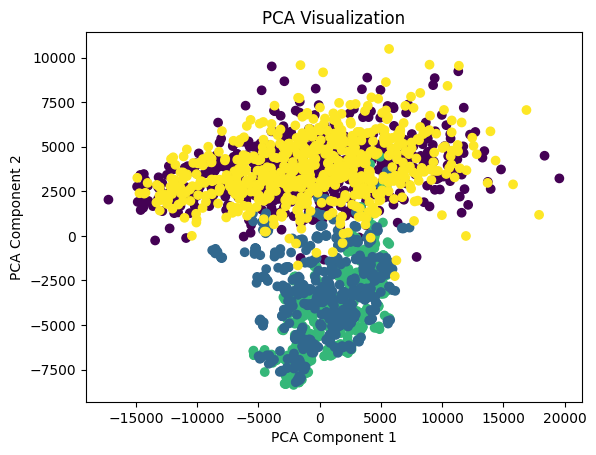

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.reshape(num_train_images, -1))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.show()

This code segment applies Principal Component Analysis (PCA) to reduce the dimensionality of the training dataset to two components. It then visualizes the dataset in a scatter plot, with colors representing different classes. This plot helps visualize data separability based on the first two PCA components.

In [ ]:
missing_images = num_train_images - len(train_data)
if missing_images > 0:
    print("Missing", missing_images, "images in training data")

This code checks for missing images in the training data by comparing the expected number of images (based on the num_train_images variable) with the actual number of images in the train_data list. If there are missing images (i.e., the actual count is less than the expected count), it prints a message indicating the number of missing images in the training data.

In [ ]:
for i in range(num_channels):
    channel_mean = np.mean(X_train[:, :, :, i])
    channel_std = np.std(X_train[:, :, :, i])
    print(f"Channel {i+1} Mean:", channel_mean)
    print(f"Channel {i+1} Std Dev:", channel_std)


Channel 1 Mean: 120.20342841507905
Channel 1 Std Dev: 70.57947893857468
Channel 2 Mean: 104.26871211998379
Channel 2 Std Dev: 67.02088002149296
Channel 3 Mean: 96.39573117146331
Channel 3 Std Dev: 66.63673008205936


This code calculates and prints the mean and standard deviation of each color channel (typically Red, Green, and Blue for RGB images) in the training dataset.
Channel 1 Mean: and Channel 1 Std Dev:: These lines display the mean and standard deviation, respectively, for the first color channel of the images. In the provided output, the mean for this channel is approximately 120.20, and the standard deviation is approximately 70.58.

Channel 2 Mean: and Channel 2 Std Dev:: These lines show the mean and standard deviation for the second color channel. In the output, the mean for this channel is approximately 104.27, and the standard deviation is approximately 67.02.

Channel 3 Mean: and Channel 3 Std Dev:: Similarly, these lines provide the mean and standard deviation for the third color channel. In the output, the mean for this channel is approximately 96.40, and the standard deviation is approximately 66.64.

These statistics are useful for understanding the distribution and characteristics of pixel values in each color channel, which can be valuable information when preprocessing or normalizing image data for machine learning models.

In [ ]:
pixel_mean = np.mean(X_train)
pixel_std = np.std(X_train)
pixel_variance = np.var(X_train)
print("Mean Pixel Value:", pixel_mean)
print("Pixel Value Std Dev:", pixel_std)
print("Pixel Value Variance:", pixel_variance)

Mean Pixel Value: 106.95595723550872
Pixel Value Std Dev: 68.81848142181356
Pixel Value Variance: 4735.983385204498


his code calculates and prints statistics related to the pixel values across all color channels of the training dataset.

Mean Pixel Value:: This line displays the mean pixel value across all color channels. In the provided output, the mean pixel value is approximately 106.96.

Pixel Value Std Dev:: This line shows the standard deviation of pixel values across all color channels. In the output, the standard deviation is approximately 68.82.

Pixel Value Variance:: Here, the code prints the variance of pixel values across all color channels. In the output, the pixel value variance is approximately 4735.98.

These statistics provide insights into the distribution and variability of pixel values in the entire training dataset. This information can be useful for understanding the overall characteristics of the image data and for preprocessing steps such as normalization or scaling, which can be crucial for machine learning model training.

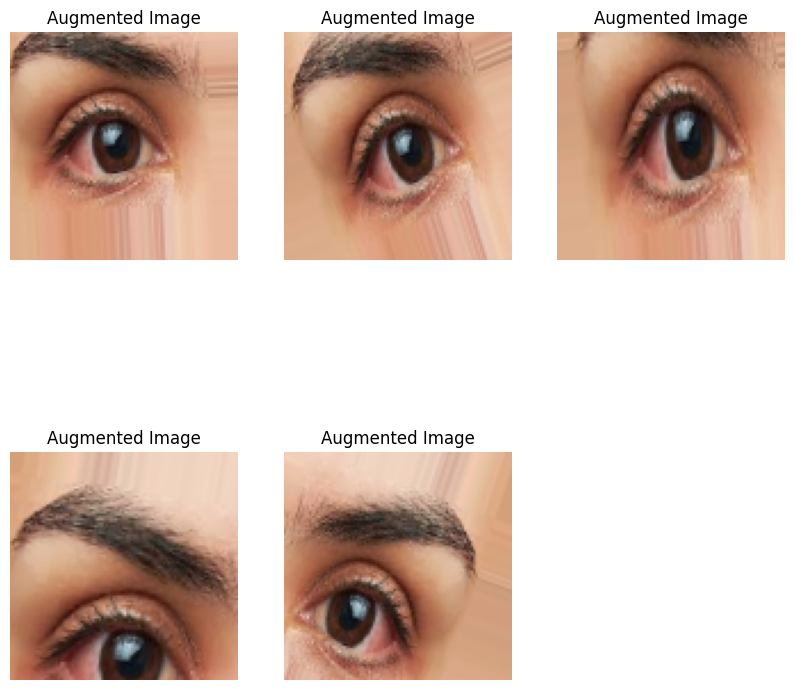

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


class_index = 0

augmentation_class_images = X_train[Y_train == class_index]

sample_image = augmentation_class_images[0]

sample_image = sample_image.reshape((1,) + sample_image.shape)

augmented_images = []
num_augmented = 5

plt.figure(figsize=(10, 10))

for batch in datagen.flow(sample_image, batch_size=1, save_to_dir=None, save_prefix='aug', save_format='png'):
    augmented_images.append(batch[0])
    num_augmented -= 1
    if num_augmented == 0:
        break

for i, augmented_image in enumerate(augmented_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image.astype(np.uint8))
    plt.title('Augmented Image')
    plt.axis('off')
plt.show()

This code demonstrates data augmentation using the ImageDataGenerator class from TensorFlow's Keras library.

ImageDataGenerator Configuration: An ImageDataGenerator object is created and configured with various data augmentation parameters, including rotation, width shift, height shift, shear, zoom, and horizontal flip. These parameters control how the generator will modify the input images during data augmentation.

Selecting a Class and Sample Image: The variable class_index is set to indicate the class (category) for which data augmentation will be demonstrated. The code then selects an example image from the training dataset that belongs to the specified class.

Reshaping the Sample Image: The selected sample image is reshaped to match the expected input shape for the data generator, which is (1, height, width, channels).

Augmenting Images: The code initializes an empty list called augmented_images to store the augmented versions of the sample image. It then enters a loop where the ImageDataGenerator is applied to the sample image. In each iteration of the loop, a new augmented image is generated based on the specified augmentation parameters and added to the list. The loop continues until the desired number of augmented images (num_augmented) is reached.

Displaying Augmented Images: Finally, the code displays the augmented images in a 2x3 grid using matplotlib. Each augmented image is shown with a title indicating it's an "Augmented Image," and the axis labels are turned off for a cleaner display.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

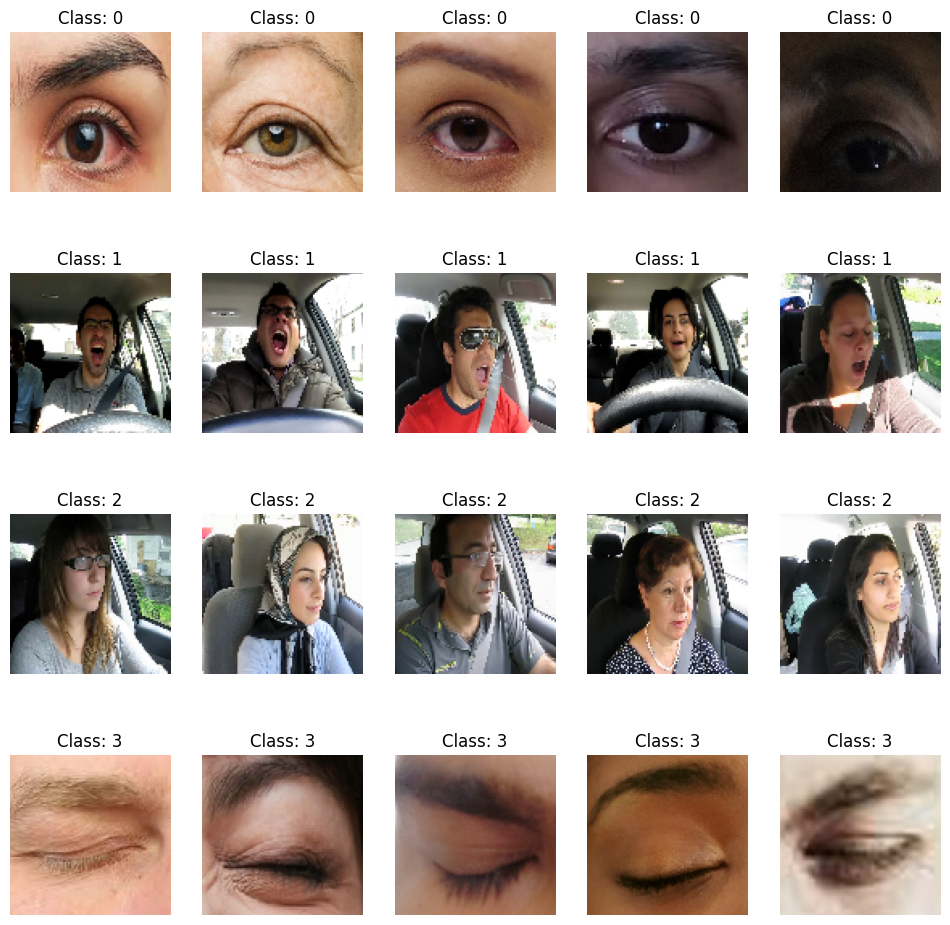

In [ ]:
num_classes_to_visualize = 4
class_labels=np.unique(Y_train)

plt.figure(figsize=(12, 12))
for i, class_label in enumerate(class_labels[:num_classes_to_visualize]):
    class_images = X_train[Y_train == class_label]
    for j in range(5):
        plt.subplot(num_classes_to_visualize, 5, i * 5 + j + 1)
        plt.imshow(class_images[j])
        plt.title(f'Class: {class_label}')
        plt.axis('off')
plt.show()


This code generates a grid of images to visualize samples from multiple classes in the training dataset.

num_classes_to_visualize: This variable specifies the number of classes to visualize.

Creating the Visualization Grid: The code initializes a figure using plt.figure(figsize=(12, 12)), setting the size of the visualization grid.

Nested Loop for Visualization: It uses nested loops to iterate through the specified number of classes (num_classes_to_visualize). For each class, it does the following:

class_images: Selects all images from the training dataset that belong to the current class.
For the first 5 images in each class (for j in range(5)), it adds a subplot to the grid:
plt.subplot(num_classes_to_visualize, 5, i * 5 + j + 1): Specifies the position of the subplot in the grid.
plt.imshow(class_images[j]): Displays the image from the current class.
plt.title(f'Class: {class_label}'): Sets the title of the subplot to indicate the class label.
plt.axis('off'): Removes axis labels and ticks for a cleaner image display.
Displaying the Visualization Grid: Finally, the code uses plt.show() to display the entire visualization grid containing sample images from multiple classes. Each row of the grid corresponds to a different class, and each column shows a sample image from that class.

78/78 [==============================] - 3s 21ms/step


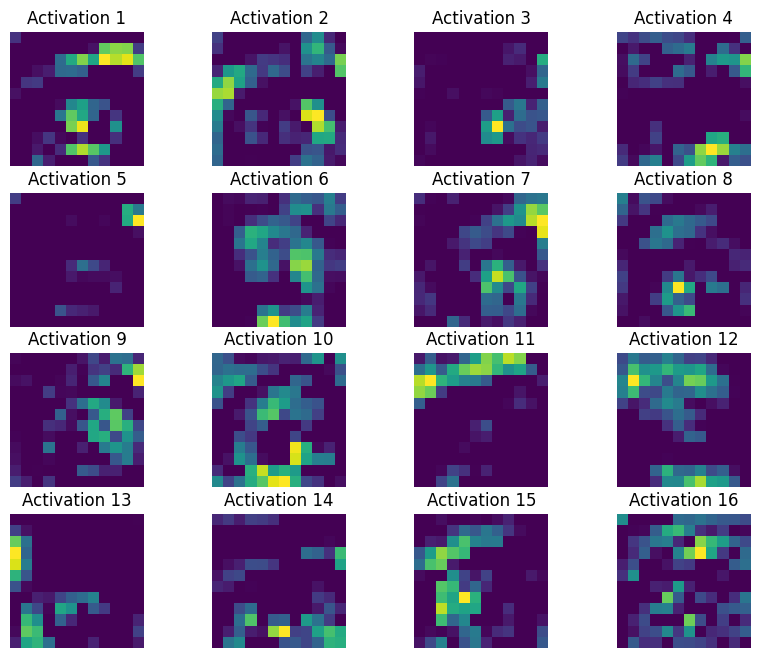

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, num_channels))
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

layer_names = [layer.name for layer in base_model.layers]
layer_name_to_visualize = layer_names[10]

intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name_to_visualize).output)
intermediate_activations = intermediate_model.predict(X_train)

plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(intermediate_activations[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Activation {i+1}')
plt.show()

This demonstrates the visualization of intermediate activations of a specific layer in a pre-trained VGG16 model.

Loading a Pre-trained VGG16 Model: It loads a pre-trained VGG16 model from the ImageNet dataset using the VGG16 function from Keras. The model's top (output) layer is excluded (include_top=False), and the input shape is set to match the dimensions of the images in your dataset (input_shape=(image_height, image_width, num_channels)).

Adding Custom Layers: Custom layers are added to the pre-trained model to adapt it to your specific classification task. A Flatten layer is applied to the base model's output, followed by a Dense layer with the number of units equal to the number of classes in your dataset and a softmax activation function. This forms the final classification head.

Creating Intermediate Activation Model: An intermediate model is created, which takes the same input as the full model but produces the activations of a specific layer. The layer_name_to_visualize variable determines which layer's activations are extracted.

Obtaining Intermediate Activations: The intermediate activations are obtained by applying the intermediate model to the training data (X_train). These activations represent the output of the chosen layer when the training data is passed through the network.

Displaying Intermediate Activations: The code creates a visualization of the first 16 activations from the selected layer. It uses matplotlib to display these activations in a 4x4 grid, where each subplot represents an activation map from the chosen layer.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion=confusion_matrix(Y_test,Y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[107   0   0   2]
 [  0  95  11   0]
 [  0   5 104   0]
 [ 14   0   0  95]]


The confusion_matrix function from Scikit-Learn calculates the confusion matrix for your classification task.

Here's what each element of the confusion matrix represents:

True Positives (TP): The number of instances correctly predicted as positive.

True Negatives (TN): The number of instances correctly predicted as negative.

False Positives (FP): The number of instances incorrectly predicted as positive (Type I error).

False Negatives (FN): The number of instances incorrectly predicted as negative (Type II error).